<h1> <center> Components of Time Series Analysis </center> </h1>

<hr></hr>

<h2><center>Objectives</center><h2>
There are four components: <b>TREND, SEASONALITY, IRREGULARITY, AND CYCLIC</b>, of any time series. In the following sections, we would use Python to explore these components of any given time series data.
<hr></hr>

<h2> <b>Step 1:</b> Importing all the required packages. </h2>

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<hr></hr>
<h2> <b>Step 2:</b> Accessing, Importing, Clearning, and Pre-Processing Data </h2>

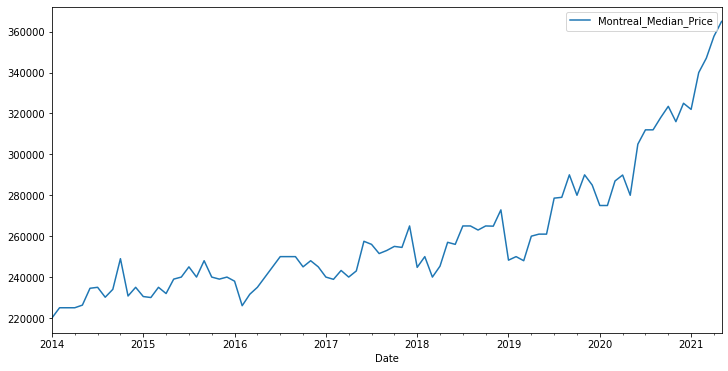

In [2]:
data_orig = pd.read_csv('quebec_real_estate.csv')
data_orig['Date'] = pd.to_datetime(data_orig['Date']) # convert date column to DateTime
ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))

<hr></hr>
A keen eye might already see from this plot that the prices seem to dip around the new year and peak a few months before, around late summer. Let’s dive a little further into this by plotting a vertical line for January of every year.
<hr></hr>

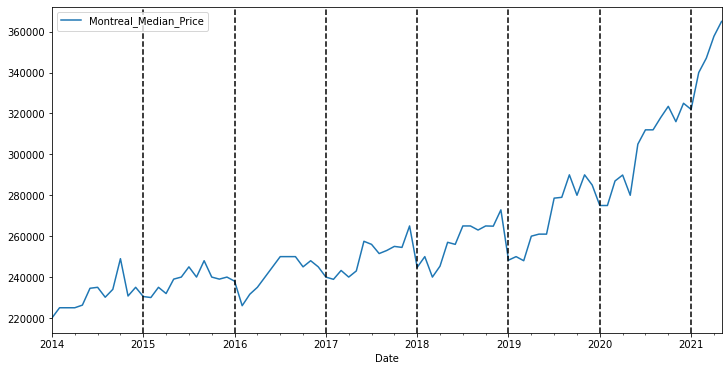

In [3]:
ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

<hr></hr>
It seems like there’s definitely a trend here. In this case, it appears the seasonality has a period of one year. Next, we’ll look into a tool we can use to further examine the seasonality and break down our time series into its trend, seasonal, and residual components. Before we can do that though, you’ll have to understand the difference between an additive and a multiplicative seasonality.
<hr></hr>

<h3><center>Decomposing the dataset</h3></center>

we can break down our real estate time series into its trend, seasonality, and residual components. We’ll be using the seasonal_decompose model from the statsmodels library.

The seasonal_decompose model requires you to select a model type for the seasonality (additive or multiplicative). We’ll select a multiplicative model since it would appear the amplitude of the cycles is increasing with time. This would make sense since a large factor for housing prices is lending rates which are done as a percentage of the price.

<hr></hr>

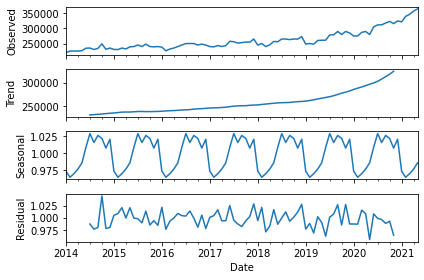

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_orig.set_index('Date', inplace=True)

analysis = data_orig[['Montreal_Median_Price']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

<hr></hr>
<h2><center>References</h2></center>

1. [Finding Seasonal Trends in Time-Series Data with Python](https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861)
